<a href="https://colab.research.google.com/github/AmanYadavKHD/DeepLearning/blob/main/VID39_Keras_Tuner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('/content/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [6]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


In [7]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [8]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
X=scaler.fit_transform(X)

In [12]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [14]:
X.shape

(768, 8)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential


In [31]:
model = Sequential()
model.add(Dense(32,activation='relu',input_dim=8))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

history=model.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=(X_test,y_test),verbose=1)

Epoch 1/100
20/20 [==============================] - 1s 14ms/step - loss: 0.6249 - accuracy: 0.6287 - val_loss: 0.6243 - val_accuracy: 0.6234
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5830 - accuracy: 0.6857 - val_loss: 0.5926 - val_accuracy: 0.6429
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5529 - accuracy: 0.7134 - val_loss: 0.5720 - val_accuracy: 0.6883
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5316 - accuracy: 0.7313 - val_loss: 0.5576 - val_accuracy: 0.7013
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5144 - accuracy: 0.7459 - val_loss: 0.5473 - val_accuracy: 0.7078
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5011 - accuracy: 0.7476 - val_loss: 0.5359 - val_accuracy: 0.7338
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4907 - accuracy: 0.7508 - val_loss: 0.5282 - val_accuracy: 0.7273
Epoch 8/100


In [32]:
model.layers[0].get_weights()

[array([[-0.14796036,  0.17266423, -0.27715167, -0.1015457 ,  0.30571622,
          0.24390918,  0.07521799,  0.09576669, -0.41198593, -0.18801524,
          0.19244131, -0.23528087,  0.47162202,  0.07500035,  0.01046133,
          0.3049665 ,  0.35732773, -0.38142306, -0.28201795, -0.4010039 ,
         -0.25238007,  0.38750324, -0.3960913 ,  0.04593221, -0.11276828,
          0.4526815 , -0.00405687, -0.24909768, -0.1324804 ,  0.23791201,
         -0.2974076 ,  0.11951329],
        [ 0.39807197, -0.40253654, -0.02943899,  0.02231287,  0.160157  ,
          0.01167111,  0.68364936, -0.3060324 , -0.32075995,  0.4590641 ,
          0.5010612 , -0.1602442 , -0.21121484,  0.00536792,  0.02941367,
         -0.1190526 ,  0.21298246, -0.42468178,  0.44641396,  0.47427318,
          0.4693425 , -0.3348317 , -0.47251514, -0.17421256, -0.3614064 ,
         -0.3756151 , -0.14705072, -0.22264268, -0.0403237 ,  0.14317715,
         -0.16786155,  0.01972181],
        [ 0.30881017,  0.03515336,  0.21

In [33]:
model.layers[1].get_weights()

[array([[ 0.52062434],
        [-0.42905855],
        [-0.3468855 ],
        [ 0.24475169],
        [ 0.2475133 ],
        [-0.5674915 ],
        [ 0.3236603 ],
        [ 0.14797035],
        [-0.5244564 ],
        [ 0.36162865],
        [ 0.27554587],
        [-0.5687743 ],
        [ 0.27356878],
        [ 0.13495946],
        [-0.2658251 ],
        [-0.17552803],
        [-0.11045137],
        [-0.55321497],
        [ 0.3892298 ],
        [ 0.37264937],
        [ 0.5581895 ],
        [ 0.21972755],
        [-0.31665602],
        [-0.1697343 ],
        [-0.31102964],
        [ 0.2527517 ],
        [-0.34866908],
        [ 0.35878423],
        [-0.58916897],
        [ 0.2506302 ],
        [-0.31902915],
        [-0.3537125 ]], dtype=float32),
 array([-0.03228813], dtype=float32)]

In [34]:
history.history

{'loss': [0.6249416470527649,
  0.5830310583114624,
  0.5529457330703735,
  0.5315608382225037,
  0.514359712600708,
  0.5011110305786133,
  0.49066826701164246,
  0.4829338788986206,
  0.4760226905345917,
  0.470211923122406,
  0.46602728962898254,
  0.46225911378860474,
  0.45845502614974976,
  0.45607224106788635,
  0.4540228247642517,
  0.45168957114219666,
  0.4495961368083954,
  0.4482772648334503,
  0.4466797709465027,
  0.4455317258834839,
  0.44375765323638916,
  0.44282448291778564,
  0.4420393705368042,
  0.4406523108482361,
  0.43971526622772217,
  0.43851327896118164,
  0.437763512134552,
  0.4366617202758789,
  0.4361450970172882,
  0.43531060218811035,
  0.4344530701637268,
  0.4336599111557007,
  0.43290606141090393,
  0.4320564866065979,
  0.430896133184433,
  0.4307609796524048,
  0.42990827560424805,
  0.42951104044914246,
  0.4283105432987213,
  0.42770588397979736,
  0.4268619418144226,
  0.4261888563632965,
  0.4256654381752014,
  0.42555245757102966,
  0.42404457

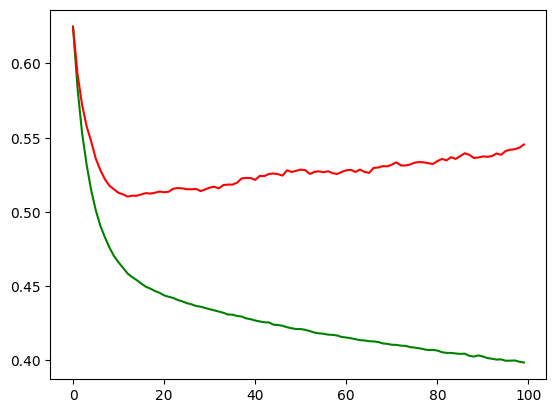

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='green')
plt.plot(history.history['val_loss'],color='red')
plt.show()

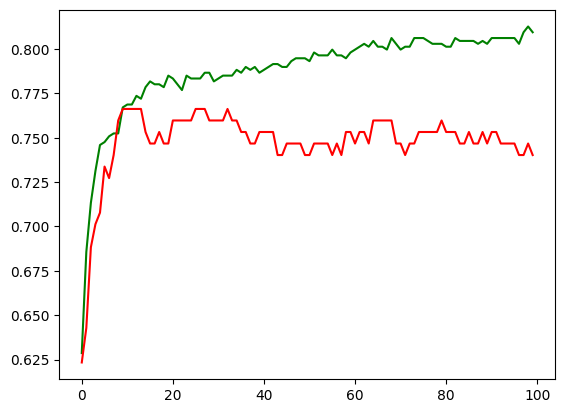

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='green')
plt.plot(history.history['val_accuracy'],color='red')
plt.show()

In [39]:
import kerastuner as kt

ModuleNotFoundError: No module named 'kerastuner'

In [45]:
#We need to install the keras tuner.
!pip install -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.5 MB/s eta 0:00:00


In [48]:
import keras_tuner as kt

In [ ]:
 def build_model(hp):
